## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [3]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [4]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [5]:
diabetes_data.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [6]:
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_data[cols_to_replace] = diabetes_data[cols_to_replace].replace(0, np.nan)

diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


**<font color='teal'> Plot histograms of each column. </font>**

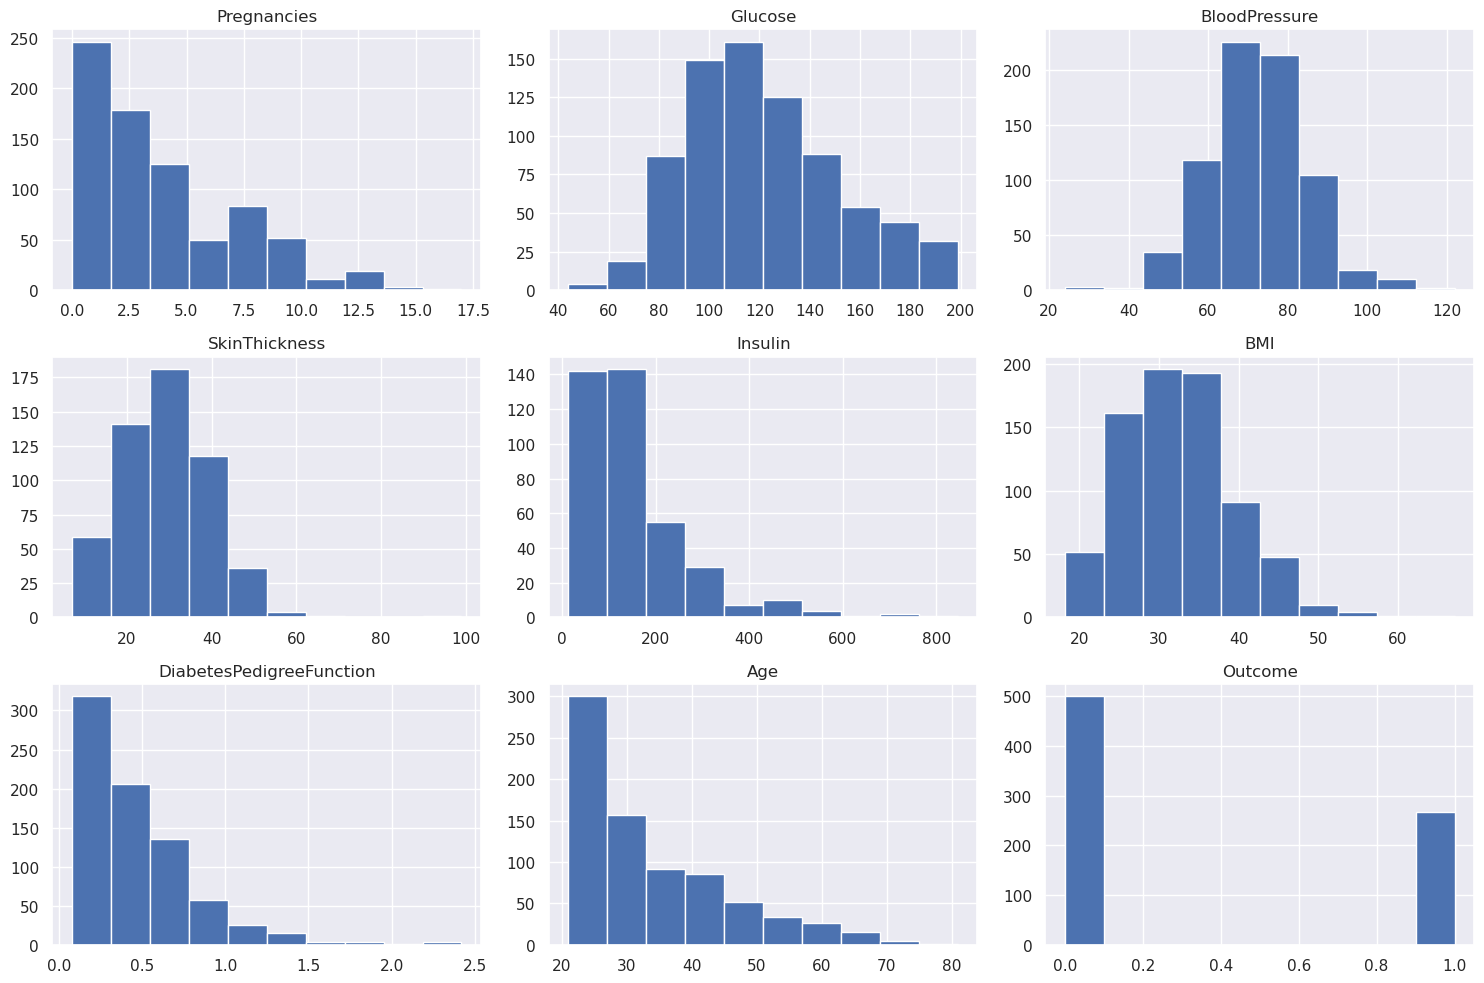

In [7]:
diabetes_data.hist(figsize=(15, 10));
plt.tight_layout()

#### Replace the zeros with mean and median values.

In [8]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

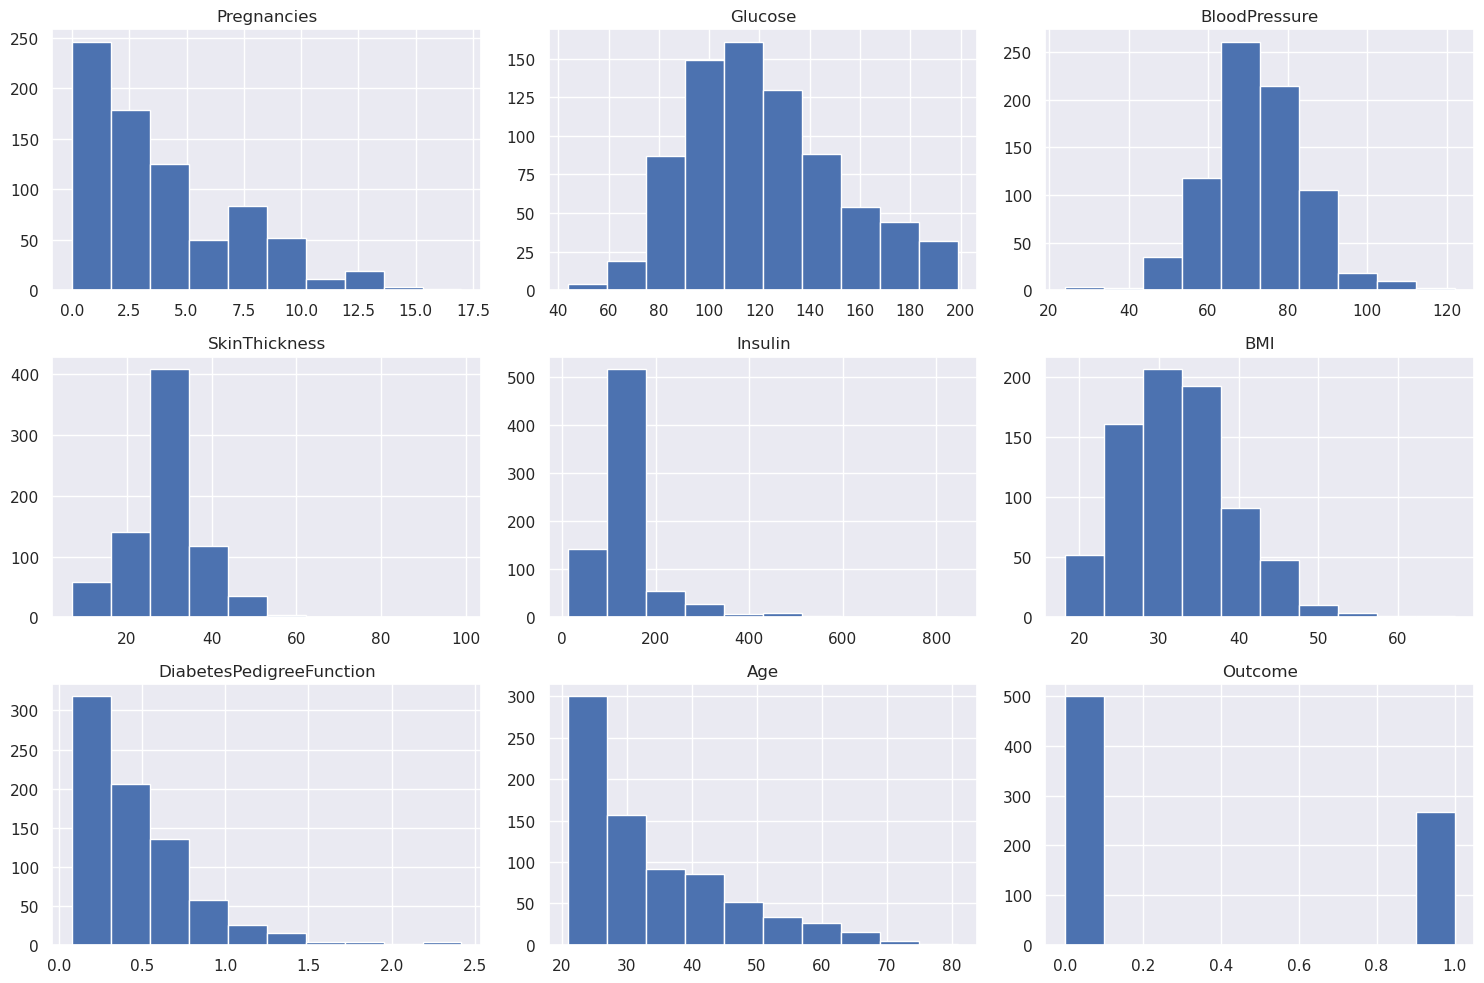

In [9]:
diabetes_data.hist(figsize=(15, 10));
plt.tight_layout()

#### Plot the correlation matrix heatmap

Correlation between various features


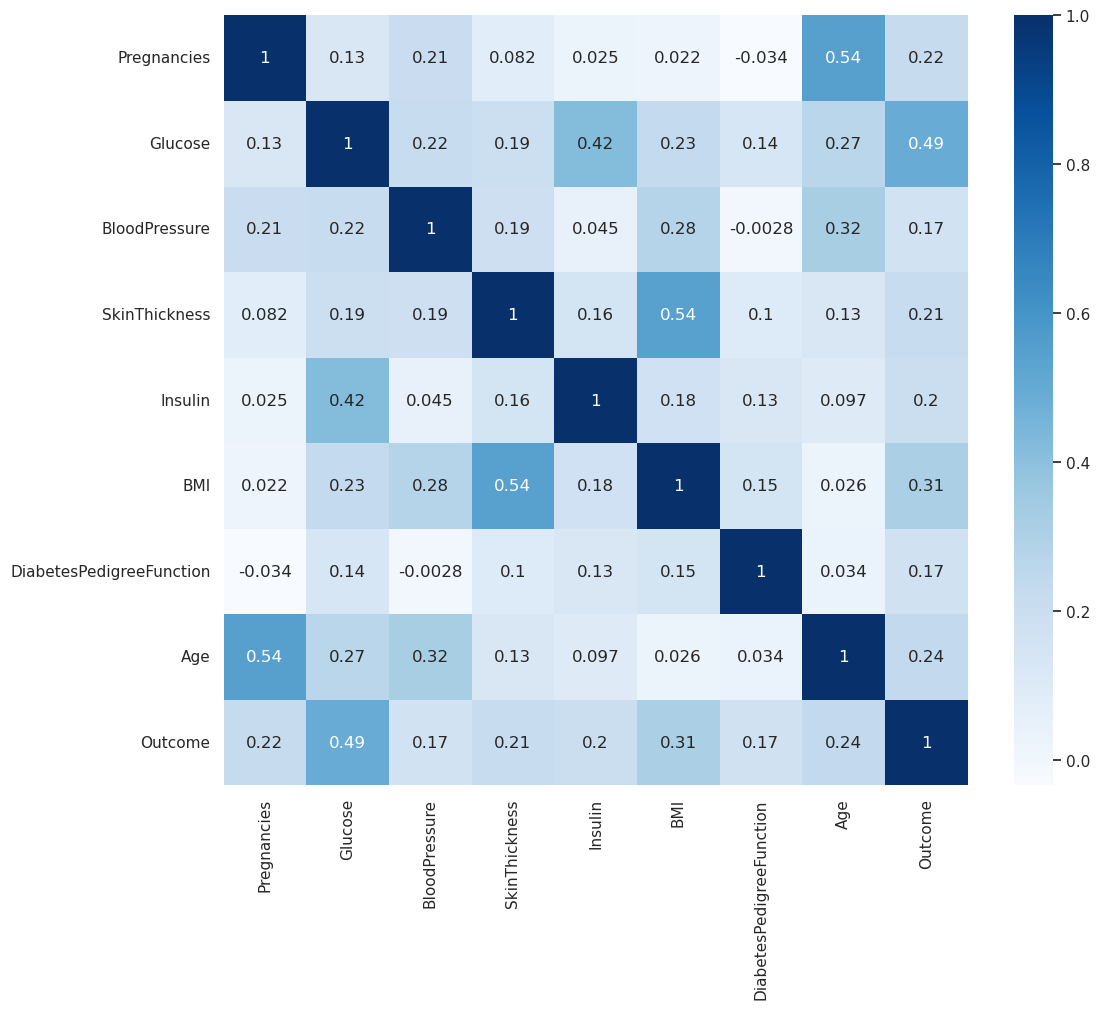

In [10]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [11]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']



**<font color='teal'> Create a 70/30 train and test split. </font>**

In [12]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed_number)

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [13]:
from sklearn.preprocessing import StandardScaler

# Instantiate the scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [32]:
print("\n--- Iterative KNN Scores (K=1 to 9) ---")
test_scores = []
train_scores = []
k_values = range(1, 10)
for i in k_values:
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)

    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)

    train_scores.append(train_score)
    test_scores.append(test_score)


--- Iterative KNN Scores (K=1 to 9) ---


**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [39]:
print(test_scores)
print(train_scores)

max_train_score = max(train_scores)
best_k_train = k_values[np.argmax(train_scores)]

max_test_score = max(test_scores)
best_k_test = k_values[np.argmax(test_scores)]




[0.6666666666666666, 0.670995670995671, 0.670995670995671, 0.6926406926406926, 0.7012987012987013, 0.683982683982684, 0.7316017316017316, 0.7359307359307359, 0.7316017316017316]
[1.0, 0.851024208566108, 0.8547486033519553, 0.8417132216014898, 0.839851024208566, 0.8230912476722533, 0.8342644320297952, 0.8212290502793296, 0.8268156424581006]


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [35]:
print(f"\nOptimal K (Training Max Score): {best_k_train} (Score: {max_train_score:.4f})")


Optimal K (Training Max Score): 1 (Score: 1.0000)


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [36]:
print(f"Optimal K (Testing Max Score): {best_k_test} (Score: {max_test_score:.4f})")

Optimal K (Testing Max Score): 8 (Score: 0.7359)


Plot the train and test model performance by number of neighbors.

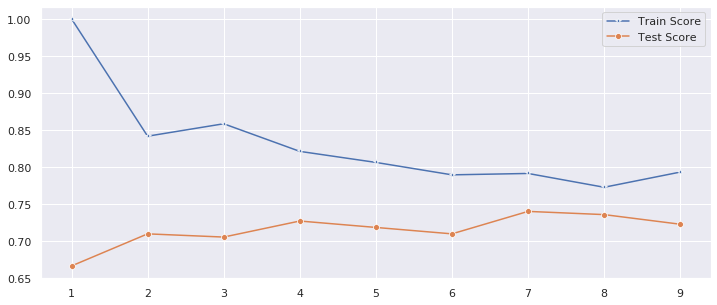

In [33]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,10),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**


Optimal K (Testing Max Score): 8 (Score: 0.7359)

--- Generating Performance Plot ---


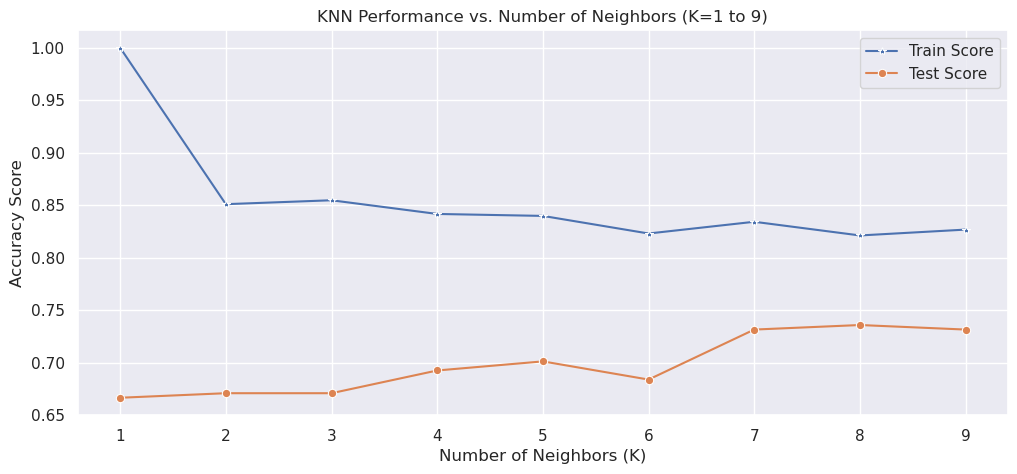

In [40]:
best_k_test = k_values[np.argmax(test_scores)]
max_test_score = max(test_scores)

print(f"\nOptimal K (Testing Max Score): {best_k_test} (Score: {max_test_score:.4f})")

# --- 2. Plotting the Scores ---
print("\n--- Generating Performance Plot ---")
plt.figure(figsize=(12,5))
# Using k_values (range(1, 10)) for the x-axis
p = sns.lineplot(x=k_values, y=train_scores, marker='*', label='Train Score')
p = sns.lineplot(x=k_values, y=test_scores, marker='o', label='Test Score')
plt.title('KNN Performance vs. Number of Neighbors (K=1 to 9)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy Score')
plt.xticks(k_values) # Ensure integer labels on the x-axis
plt.legend()
plt.show()

In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

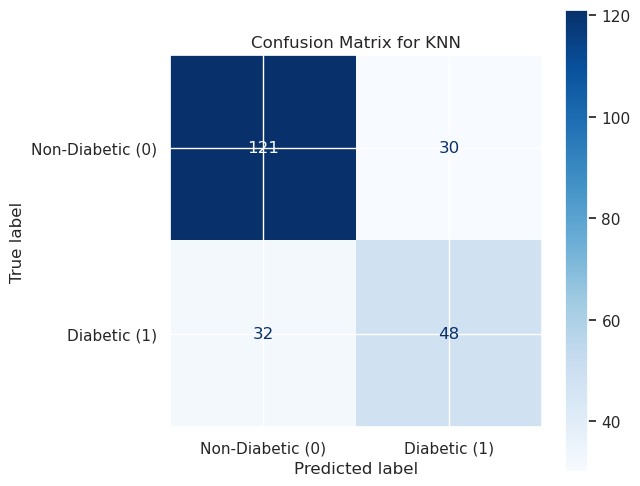

In [57]:

fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=pl, display_labels=['Non-Diabetic (0)', 'Diabetic (1)'])
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title(f'Confusion Matrix for KNN')
plt.show()


**<font color='teal'> Print the classification report </font>**

In [61]:
from sklearn.metrics import classification_report
print(f"--- Classification Report for KNN ")
# The target_names correspond to the display labels used in the confusion matrix
report = classification_report(
    y_test, 
    y_pred, 
    target_names=['Non-Diabetic (0)', 'Diabetic (1)']
)
print(report)

--- Classification Report for KNN 
                  precision    recall  f1-score   support

Non-Diabetic (0)       0.79      0.80      0.80       151
    Diabetic (1)       0.62      0.60      0.61        80

        accuracy                           0.73       231
       macro avg       0.70      0.70      0.70       231
    weighted avg       0.73      0.73      0.73       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [62]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [63]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7526440879382056
Best Parameters: {'n_neighbors': 31}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [66]:
from sklearn.ensemble import RandomForestClassifier
# 1. Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# 2. Define the parameter grid
param_grid_rf = {
    # 'n_estimators': number of trees
    'n_estimators': np.arange(10, 201, 10),
    # 'max_depth': maximum depth of the tree
    'max_depth': [None, 5, 10, 15]
}

# 3. Initialize and run GridSearchCV (using 5-fold cross-validation)
rf_cv = GridSearchCV(rf_model, param_grid_rf, cv=5, verbose=1, scoring='accuracy', n_jobs=-1)

# Fit the model to the scaled training data
rf_cv.fit(X_train, y_train)

# 4. Print the best score and best parameters
print("Best Score:" + str(rf_cv.best_score_))
print("Best Parameters: " + str(rf_cv.best_params_))

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Score:0.7708722741433022
Best Parameters: {'max_depth': None, 'n_estimators': 200}
